In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Cargar el dataset de entrenamiento
df_train = pd.read_csv("../data/train.csv")

# Mostrar información general del dataset
print("dataset shape:", df_train.shape)
print("\nInfo:")
print(df_train.info())

# Resumen estadístico de variables numéricas
print("\nDescribe:")
print(df_train.describe())



dataset shape: (1460, 81)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460

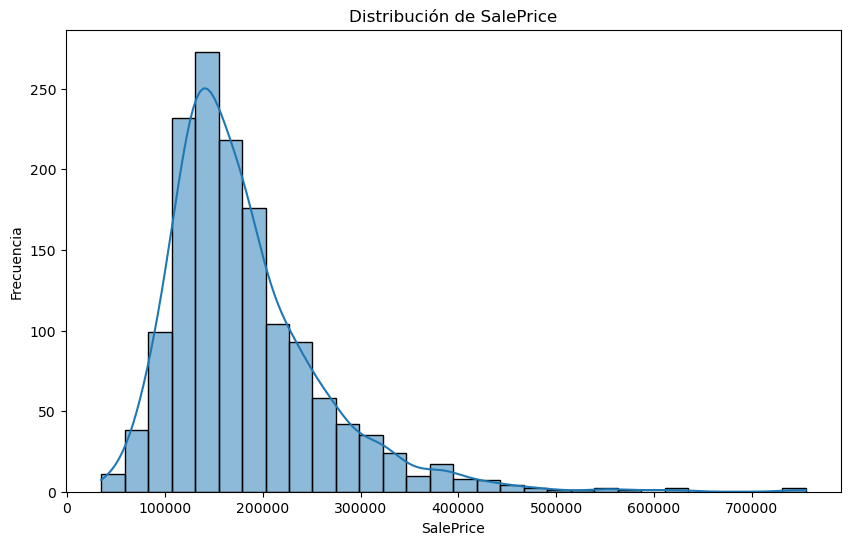

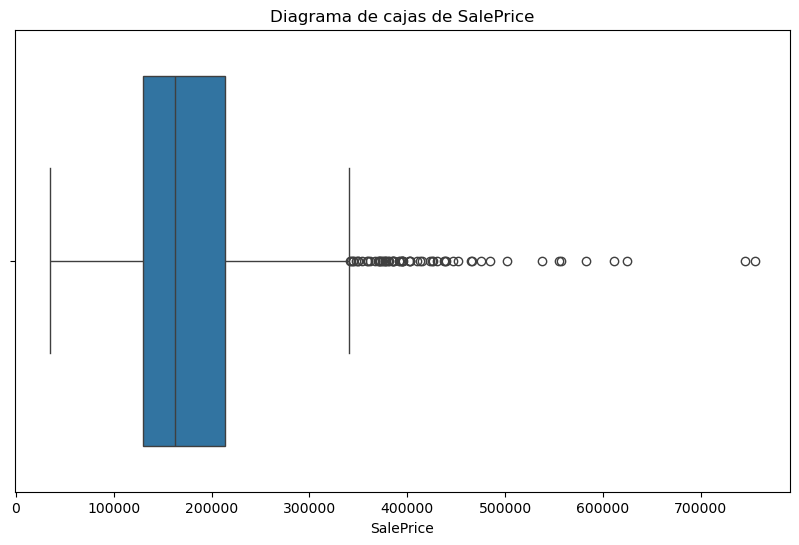

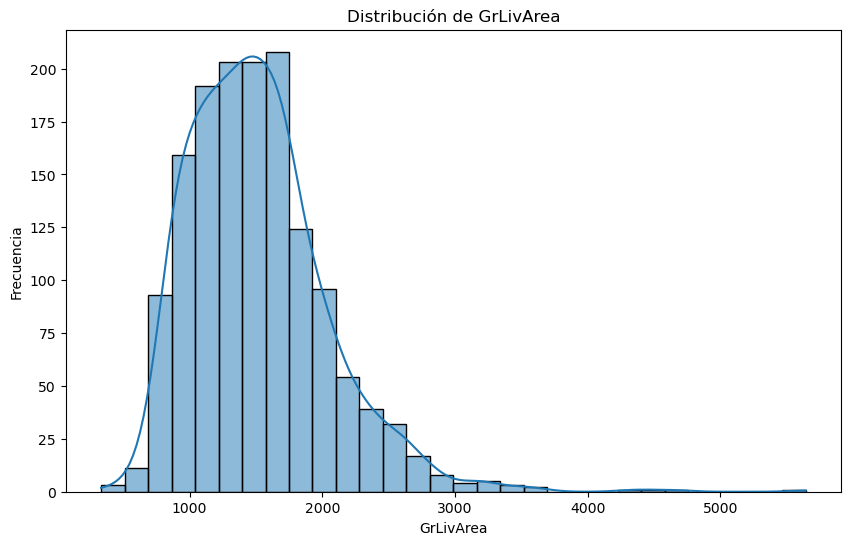

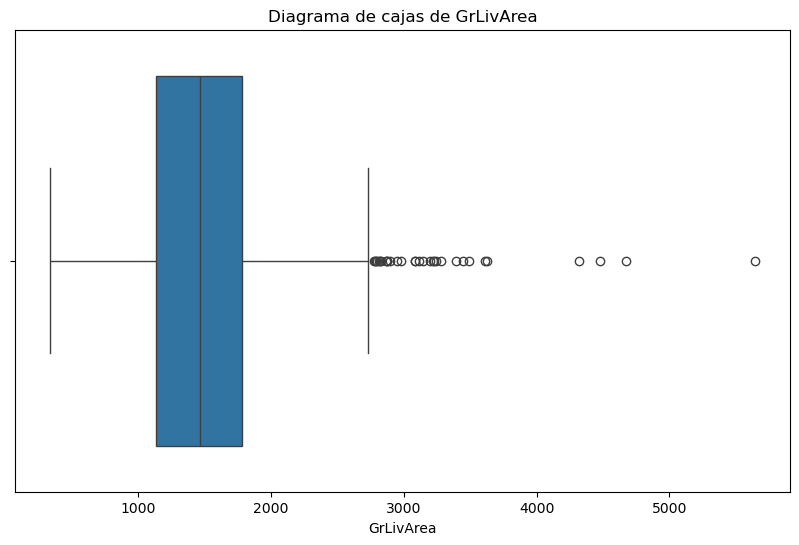

In [3]:
# Histograma de la variable 'SalePrice'
plt.figure(figsize=(10, 6))
sns.histplot(df_train['SalePrice'], kde=True, bins=30)
plt.title('Distribución de SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frecuencia')
plt.show()

# Diagrama de cajas (boxplot) de la variable 'SalePrice'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_train['SalePrice'])
plt.title('Diagrama de cajas de SalePrice')
plt.xlabel('SalePrice')
plt.show()

# Opcional: Mostrar distribución de otra variable numérica, por ejemplo 'GrLivArea'
plt.figure(figsize=(10, 6))
sns.histplot(df_train['GrLivArea'], kde=True, bins=30)
plt.title('Distribución de GrLivArea')
plt.xlabel('GrLivArea')
plt.ylabel('Frecuencia')
plt.show()

# Opcional: Diagrama de cajas para 'GrLivArea'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_train['GrLivArea'])
plt.title('Diagrama de cajas de GrLivArea')
plt.xlabel('GrLivArea')
plt.show()


In [6]:
# Missing values
missing = df_train.isnull().sum()
missing_percent = (missing / df_train.shape[0]) * 100
missing_df = pd.DataFrame({'Missing Count': missing, 'Missing %': missing_percent})
print("Missing values per column:")
print(missing_df.sort_values(by='Missing %', ascending=False))

# Correlation matrix
df_numeric = df_train.select_dtypes(include=[np.number])
corr_matrix = df_numeric.corr()

saleprice_corr = corr_matrix['SalePrice'].sort_values(ascending=False)
print("\nSalePrice correlations:")
print(saleprice_corr)

# outliers
def outlier_analysis(series, variable_name):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    total = series.shape[0]
    percent_outliers = 100 * outliers.shape[0] / total
    print(f"\nOutliers for {variable_name}:")
    print(f"  Total observations: {total}")
    print(f"  Number of outliers: {outliers.shape[0]}")
    print(f"  Outliers %: {percent_outliers:.2f}%")
    print(f"  Min value outliers: {outliers.min()}")
    print(f"  Max value outliers: {outliers.max()}")

# SalePrice outliers 
outlier_analysis(df_train['SalePrice'], 'SalePrice')

Missing values per column:
             Missing Count  Missing %
PoolQC                1453  99.520548
MiscFeature           1406  96.301370
Alley                 1369  93.767123
Fence                 1179  80.753425
MasVnrType             872  59.726027
...                    ...        ...
ExterQual                0   0.000000
Exterior2nd              0   0.000000
Exterior1st              0   0.000000
RoofMatl                 0   0.000000
SalePrice                0   0.000000

[81 rows x 2 columns]

SalePrice correlations:
SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
O